[26 86  2 55 75 93 16 73 54 95 53 92 78 13  7 30 22 24 33  8 43 62  3 71
 45 48  6 99 82 76 60 80 90 68 51 27 18 56 63 74  1 61 42 41  4 15 17 40
 38  5 91 59  0 34 28 50 11 35 23 52 10 31 66 57 79 85 32 84 14 89 19 29
 49 97 98 69 20 94 72 77 25 37 81 46 39 65 58 12 88 70 87 36 21 83  9 96
 67 64 47 44]


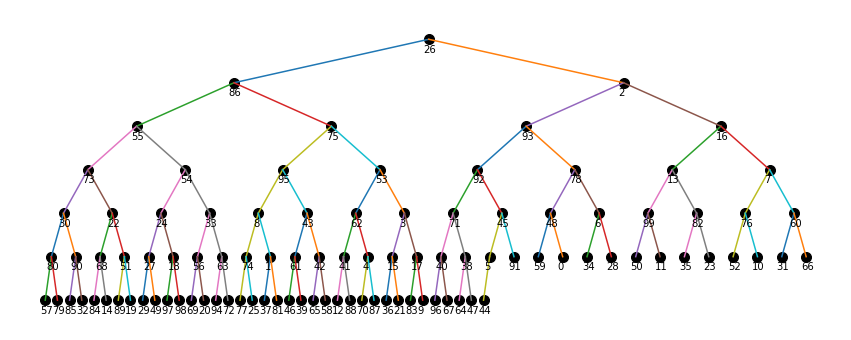

TypeError: 'NoneType' object is not subscriptable

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from heapq import heappush, heappop

class HeapTree(object):
    def __init__(self):
        self._arr = []

    def __len__(self):
        return len(self._arr)

    def _children(self, i):
        children = []
        if 2*i+1 < len(self._arr):
            children.append(2*i+1)
        if 2*i+2 < len(self._arr):
            children.append(2*i+2)
        return children
    
    def _parent(self, i):
        return (i-1)//2
    
    def _swap(self, i, j):
        self._arr[i], self._arr[j] = self._arr[j], self._arr[i]

    def _heapdown(self, i):
        ## TODO: Fill this in: Bubble this entry down as far as needed
        pass
        
    def _heapup(self, i):
        ## TODO: Fill this in: Bubble entry up as far as needed
        pass
    
    def push(self, entry):
        """
        Add an entry to the heap, maintaining the heap invariant
        
        Parameters
        ----------
        entry: tuple of (int, object)
            A tuple representing the priority, attached with an object
        """
        self._arr.append(entry)
        ## TODO: Fill this in
    
    def pop(self):
        """
        Delete the minimum entry from the heap, and put something in 
        its place the maintains the heap invariant
        
        Returns
        ----------
        tuple of (int, object)
            A tuple representing the priority, attached with an object, of
            the minimum priority object just removed
        """
        assert(len(self) > 0)
        ## TODO: Fill this in

    def peek(self):
        """
        Return the minimum value from the heap without removing it
        
        Returns
        ----------
        tuple of (int, object)
            A tuple representing the priority, attached with an object, of
            the minimum priority object just removed
        """
        assert(len(self) > 0)
        return self._arr[0]

    def draw(self, width_fac=0.7):
        N = len(self._arr)
        height = int(np.ceil(np.log2(N)))
        width = width_fac*2**height
        xs = np.zeros(N)
        ys = np.zeros(N)
        level = -1
        xi = 0
        # First draw nodes, and remember positions
        # in the process
        x0 = width_fac*width/2
        for i in range(N):
            if np.log2(i+1) == int(np.log2(i+1)):
                level += 1
                xi = 0
                x0 -= width_fac*2**(height-level-1)
            stride = width_fac*2**(height-level)
            x = x0 + xi*stride
            y = -5*level
            plt.scatter([x], [y], 100, c='k')
            s = "{}".format(self._arr[i][0])
            if self._arr[i][1]:
                s = s + " ({})".format(self._arr[i][1])
            plt.text(x-0.6, y-1.5, s)
            xs[i] = x
            ys[i] = y
            xi += 1
        # Next draw edges
        for i in range(N):
            for j in self._children(i):
                plt.plot([xs[i], xs[j]], [ys[i], ys[j]])
        plt.axis("off")
        plt.axis("equal")


T = HeapTree()
np.random.seed(0)
vals = np.random.permutation(100)
print(vals)
for v in vals:
    T.push((v, None))

plt.figure(figsize=(15, 6))
T.draw()
plt.show()

while len(T) > 0:
    print(T.pop()[0], end = ' ')
print("")